In [36]:
import pandas as pd
import matplotlib
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.6+ KB


In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df1=df.drop(columns='society')
df1.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [7]:
df1.dropna(inplace=True)
df1.shape

(12710, 8)

In [8]:
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


Exploring the housing price in Banglore

In [9]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [10]:
df1['size']=df1['size'].replace(['1 RK','1 Bedroom'],'1 BHK')
df1['size']=df1['size'].replace('2 Bedroom','2 BHK')
df1['size']=df1['size'].replace('3 Bedroom','3 BHK')
df1['size']=df1['size'].replace('4 Bedroom','4 BHK')
df1['size']=df1['size'].replace('5 Bedroom','5 BHK')
df1['size']=df1['size'].replace('6 Bedroom','6 BHK')
df1['size']=df1['size'].replace('7 Bedroom','7 BHK')
df1['size']=df1['size'].replace('8 Bedroom','8 BHK')
df1['size']=df1['size'].replace('9 Bedroom','9 BHK')
df1['size']=df1['size'].replace('10 Bedroom','10 BHK')
df1['size']=df1['size'].replace('11 Bedroom','11 BHK')
df1['size']=df1['size'].replace('12 Bedroom','12 BHK')
df1['size']=df1['size'].replace('43 Bedroom','43 BHK')
df1['size'].unique()

array(['2 BHK', '4 BHK', '3 BHK', '1 BHK', '6 BHK', '8 BHK', '7 BHK',
       '5 BHK', '11 BHK', '9 BHK', '27 BHK', '43 BHK', '14 BHK', '12 BHK',
       '10 BHK', '13 BHK'], dtype=object)

In [11]:
df1['size'].value_counts()

2 BHK     5480
3 BHK     4655
4 BHK     1238
1 BHK      648
5 BHK      299
6 BHK      192
7 BHK       85
8 BHK       68
9 BHK       34
10 BHK       3
11 BHK       3
13 BHK       1
12 BHK       1
43 BHK       1
14 BHK       1
27 BHK       1
Name: size, dtype: int64

In [12]:
# 2 BHK
a=df1.loc[df1['size']=='2 BHK']
print(' Average price of 2 BHK flat is: ' + str(round(a['price'].mean(),2)) + ' Lakhs')
print(' Median price of 2 BHK flat is: ' + str(round(a['price'].median(),2)) + ' Lakhs')
print(' Minimum price of 2 BHK flat is: ' + str(round(a['price'].min(),2)) + ' Lakhs')
print(' Maximum price of 2 BHK flat is: ' + str(round(a['price'].max(),2)) + ' Lakhs')
print(' Std. Deviation in price of 2 BHK flat is: ' + str(round(a['price'].std(),2)) + ' Lakhs')

 Average price of 2 BHK flat is: 59.51 Lakhs
 Median price of 2 BHK flat is: 53.5 Lakhs
 Minimum price of 2 BHK flat is: 10.5 Lakhs
 Maximum price of 2 BHK flat is: 650.0 Lakhs
 Std. Deviation in price of 2 BHK flat is: 30.36 Lakhs


In [13]:
# 3 BHK
b=df1.loc[df1['size']=='3 BHK']
print(' Average price of 3 BHK flat is: ' + str(round(b['price'].mean(),2)) + ' Lakhs')
print(' Median price of 3 BHK flat is: ' + str(round(b['price'].median(),2)) + ' Lakhs')
print(' Minimum price of 3 BHK flat is: ' + str(round(b['price'].min(),2)) + ' Lakhs')
print(' Maximum price of 3 BHK flat is: ' + str(round(b['price'].max(),2)) + ' Lakhs')
print(' Std. Deviation in price of 3 BHK flat is: ' + str(round(b['price'].std(),2)) + ' Lakhs')

 Average price of 3 BHK flat is: 109.22 Lakhs
 Median price of 3 BHK flat is: 87.01 Lakhs
 Minimum price of 3 BHK flat is: 10.0 Lakhs
 Maximum price of 3 BHK flat is: 2000.0 Lakhs
 Std. Deviation in price of 3 BHK flat is: 84.56 Lakhs


In [14]:
# 4 BHK
c=df1.loc[df1['size']=='4 BHK']
print(' Average price of 4 BHK flat is: ' + str(round(c['price'].mean(),2)) + ' Lakhs')
print(' Median price of 4 BHK flat is: ' + str(round(c['price'].median(),2)) + ' Lakhs')
print(' Minimum price of 4 BHK flat is: ' + str(round(c['price'].min(),2)) + ' Lakhs')
print(' Maximum price of 4 BHK flat is: ' + str(round(c['price'].max(),2)) + ' Lakhs')
print(' Std. Deviation in price of 4 BHK flat is: ' + str(round(c['price'].std(),2)) + ' Lakhs')

 Average price of 4 BHK flat is: 256.94 Lakhs
 Median price of 4 BHK flat is: 198.0 Lakhs
 Minimum price of 4 BHK flat is: 24.5 Lakhs
 Maximum price of 4 BHK flat is: 2912.0 Lakhs
 Std. Deviation in price of 4 BHK flat is: 235.68 Lakhs


In [15]:
# 1 BHK
d=df1.loc[df1['size']=='1 BHK']
print(' Average price of 1 BHK flat is: ' + str(round(d['price'].mean(),2)) + ' Lakhs')
print(' Median price of 1 BHK flat is: ' + str(round(d['price'].median(),2)) + ' Lakhs')
print(' Minimum price of 1 BHK flat is: ' + str(round(d['price'].min(),2)) + ' Lakhs')
print(' Maximum price of 1 BHK flat is: ' + str(round(d['price'].max(),2)) + ' Lakhs')
print(' Std. Deviation in price of 1 BHK flat is: ' + str(round(d['price'].std(),2)) + ' Lakhs')

 Average price of 1 BHK flat is: 44.71 Lakhs
 Median price of 1 BHK flat is: 34.3 Lakhs
 Minimum price of 1 BHK flat is: 8.0 Lakhs
 Maximum price of 1 BHK flat is: 750.0 Lakhs
 Std. Deviation in price of 1 BHK flat is: 55.32 Lakhs


In [16]:
# Costliest House in Bangalore
print('The most expensive House in Bengaluru is: ' + str(round(df1['price'].max(),2)) + ' Lakhs')

#cheapest House in Bangalore
print('The cheapest House in Bengaluru is: ' + str(round(df1['price'].min(),2)) + ' Lakhs')


The most expensive House in Bengaluru is: 2912.0 Lakhs
The cheapest House in Bengaluru is: 8.0 Lakhs


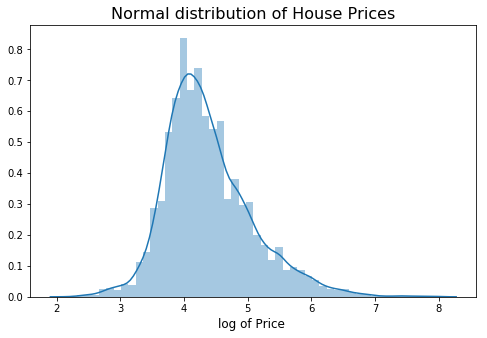

In [17]:
#House Prices trend in Bengaluru
df1['price_log'] = np.log(df1["price"] + 1)
plt.figure(figsize=(8,5))
sns.distplot(df1['price_log'])
plt.xlabel('log of Price ', fontsize=12)
plt.title("Normal distribution of House Prices", fontsize=16)
plt.show()


Exploring the Locations

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df1[~df1['total_sqft'].apply(is_float)].head(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_log
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,5.231109
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,6.169611
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,4.007424
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,3.795264
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,4.056989
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,2.970414
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,4.170843
661,Super built-up Area,Ready To Move,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,3.894470
672,Built-up Area,18-Mar,Bettahalsoor,4 BHK,3090 - 5002,4.0,0.0,445.000,6.100319
772,Super built-up Area,20-Dec,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,4.109808


In [19]:
def convert_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

df2 = df1.copy()
df2['total_sqft'] = df2['total_sqft'].apply(convert_to_num)
df2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_log
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,3.690628
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,2600.0,5.0,3.0,120.00,4.795791
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,4.143135
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,4.564348
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,3.951244


In [20]:
df2['price_per_sqft'] = df2['price']*100000/df2['total_sqft']
df2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_log,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,3.690628,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,2600.0,5.0,3.0,120.00,4.795791,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,4.143135,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,4.564348,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,3.951244,4250.000000


In [21]:
# Most expensive location in Bengaluru 
k=df2.loc[df2['price_per_sqft']==df2['price_per_sqft'].max()]
k

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_log,price_per_sqft
4972,Built-up Area,Ready To Move,Srirampuram,7 BHK,5.0,7.0,3.0,115.0,4.75359,2300000.0


In [23]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_log,price_per_sqft,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,3.690628,3699.810606,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,2600.0,5.0,3.0,120.00,4.795791,4615.384615,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,4.143135,4305.555556,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,4.564348,6245.890861,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,3.951244,4250.000000,2


In [25]:
len(df2.location.unique())

1265

In [26]:
df2.location = df2.location.apply(lambda x: x.strip())
location_stats = df2.groupby('location')['location'].count().sort_values(ascending = False)
location_stats

location
Whitefield                                      515
Sarjapur  Road                                  372
Electronic City                                 302
Kanakpura Road                                  261
Thanisandra                                     234
Yelahanka                                       206
Uttarahalli                                     186
Hebbal                                          173
Raja Rajeshwari Nagar                           168
Marathahalli                                    164
7th Phase JP Nagar                              147
Bannerghatta Road                               144
Hennur Road                                     142
Haralur Road                                    135
Electronic City Phase II                        130
Rajaji Nagar                                     99
Chandapura                                       98
Bellandur                                        91
Hoodi                                            86
Ele

In [27]:
len(location_stats[location_stats<=10])

1017

In [28]:
location_stats_lessthan_10 = location_stats[location_stats<=10]
location_stats_lessthan_10

location
Kalkere                                         10
Dairy Circle                                    10
1st Block Koramangala                           10
Ganga Nagar                                     10
Basapura                                        10
Gunjur Palya                                    10
Kodigehalli                                     10
HAL 2nd Stage                                   10
Naganathapura                                   10
Nagappa Reddy Layout                            10
5th Block Hbr Layout                             9
Kamakshipalya                                    9
Vignana Nagar                                    9
Lingarajapuram                                   9
Ejipura                                          9
Volagerekallahalli                               9
Chennammana Kere                                 9
KUDLU MAIN ROAD                                  9
Kaverappa Layout                                 9
Chandra Layout        

In [29]:
df2.location = df2.location.apply(lambda x: 'other' if x in location_stats_lessthan_10 else x)
df2[df2.total_sqft/df2.bhk<300].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_log,price_per_sqft,bhk
58,Plot Area,Ready To Move,Murugeshpalya,6 BHK,1407.0,4.0,1.0,150.0,5.017280,10660.980810,6
68,Plot Area,Ready To Move,Devarachikkanahalli,8 BHK,1350.0,7.0,0.0,85.0,4.454347,6296.296296,8
70,Plot Area,Ready To Move,other,3 BHK,500.0,3.0,2.0,100.0,4.615121,20000.000000,3
78,Built-up Area,Ready To Move,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,3.135494,4782.608696,2
89,Plot Area,Ready To Move,Rajaji Nagar,6 BHK,710.0,6.0,3.0,160.0,5.081404,22535.211268,6


In [31]:
df3 = df2[~(df2.total_sqft/df2.bhk<300)]
df3.shape

(12055, 11)

In [32]:
df3.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [34]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df4 = remove_outliers(df3)
df4.shape

(9848, 11)

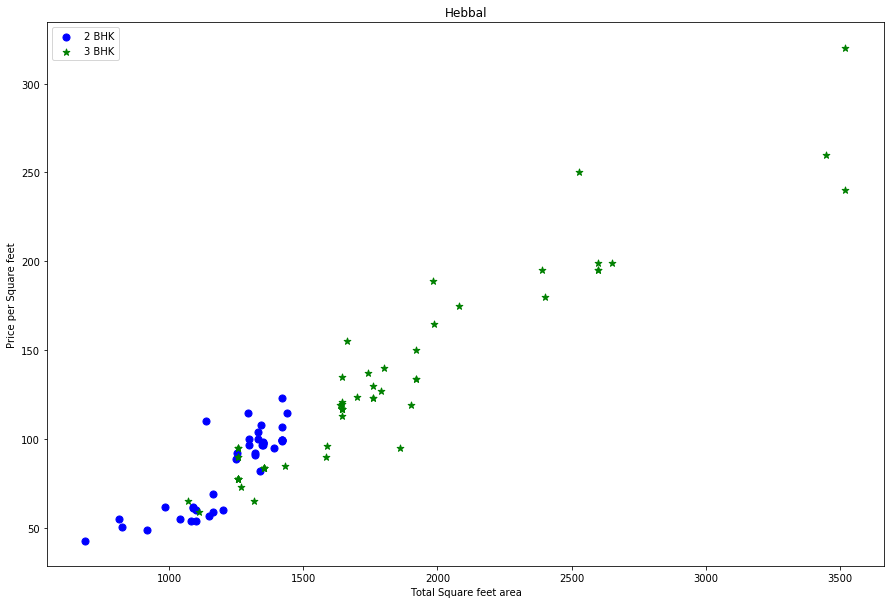

In [37]:
def scatter_plot(df, location):
    bhk2 = df[(df.location==location) & (df.bhk == 2)]
    bhk3 = df[(df.location==location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = [15, 10]
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '*', color = 'green', label = '3 BHK', s = 50)
    plt.xlabel('Total Square feet area')
    plt.ylabel('Price per Square feet')
    plt.title(location)
    plt.legend()
    
scatter_plot(df4,'Hebbal')

In [38]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df4)
df5.shape

(7025, 11)

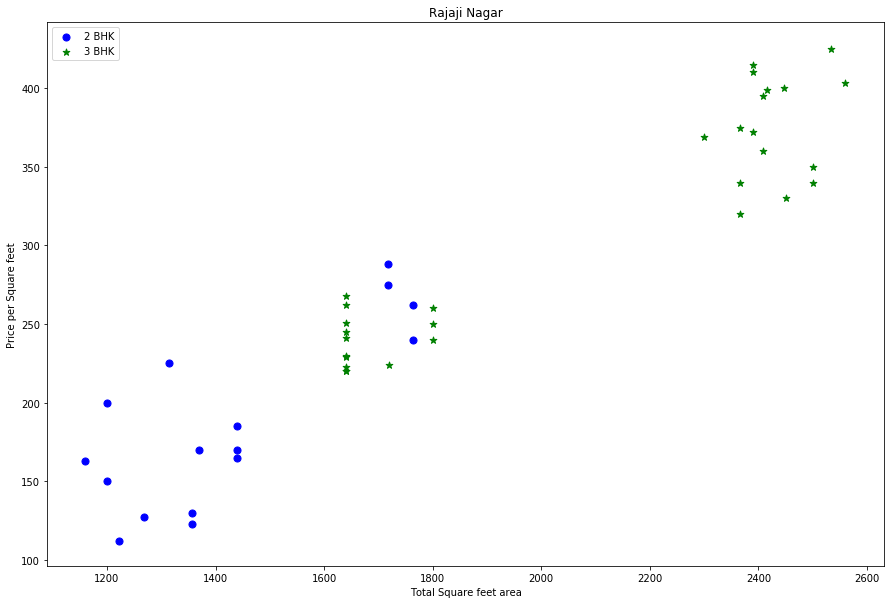

In [39]:
scatter_plot(df5,"Rajaji Nagar")

In [40]:
df5.bath.unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

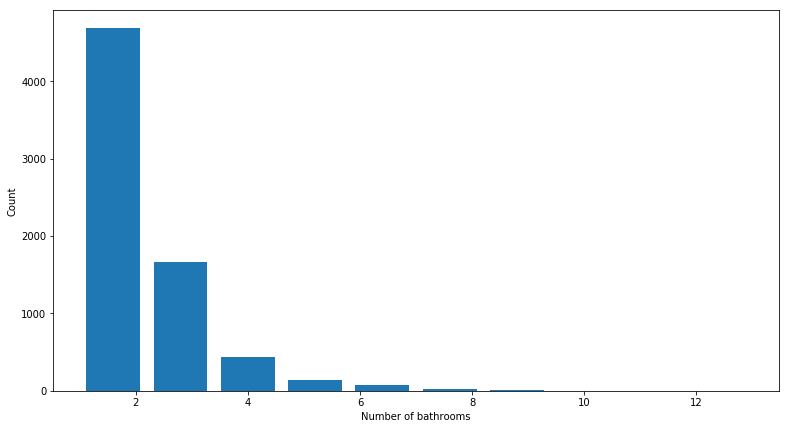

In [46]:
plt.figure(figsize=(13,7))
plt.hist(df5.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show()

In [47]:
df5[df5.bath > df5.bhk+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_log,price_per_sqft,bhk
1542,Built-up Area,Ready To Move,Chikkabanavar,4 BHK,2460.0,7.0,2.0,80.0,4.394449,3252.032520,4
6450,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,4.762174,6423.034330,3
8091,Super built-up Area,Ready To Move,other,6 BHK,11338.0,9.0,1.0,1000.0,6.908755,8819.897689,6


In [48]:
df6 = df5[df5.bath < df5.bhk+2]
df6.shape

(6958, 11)

In [49]:
df7 = df6.drop(['size','price_per_sqft'],axis='columns')
df7.head()

,area_type,availability,location,total_sqft,bath,balcony,price,price_log,bhk
0,Super built-up Area,20-May,1st Block Jayanagar,2850.0,4.0,1.0,428.0,6.061457,4
1,Super built-up Area,18-Jun,1st Block Jayanagar,1630.0,3.0,2.0,194.0,5.273000,3
2,Super built-up Area,Ready To Move,1st Block Jayanagar,1875.0,2.0,3.0,235.0,5.463832,3
3,Built-up Area,15-Dec,1st Block Jayanagar,1200.0,2.0,0.0,130.0,4.875197,3
4,Super built-up Area,18-Jun,1st Block Jayanagar,1235.0,2.0,2.0,148.0,5.003946,2


In [50]:
dummies = pd.get_dummies(df7.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df8 = pd.concat([df7,dummies.drop('other',axis='columns')],axis='columns')
df8.head()

,area_type,availability,location,total_sqft,bath,balcony,price,price_log,bhk,1st Block Jayanagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,20-May,1st Block Jayanagar,2850.0,4.0,1.0,428.0,6.061457,4,1,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,18-Jun,1st Block Jayanagar,1630.0,3.0,2.0,194.0,5.273000,3,1,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,1st Block Jayanagar,1875.0,2.0,3.0,235.0,5.463832,3,1,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,15-Dec,1st Block Jayanagar,1200.0,2.0,0.0,130.0,4.875197,3,1,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,18-Jun,1st Block Jayanagar,1235.0,2.0,2.0,148.0,5.003946,2,1,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df9 = df8.drop('location',axis='columns')
df9.head(2)

,area_type,availability,total_sqft,bath,balcony,price,price_log,bhk,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,20-May,2850.0,4.0,1.0,428.0,6.061457,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,18-Jun,1630.0,3.0,2.0,194.0,5.273000,3,1,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
X = df9.drop(['price','availability','area_type'],axis='columns')
X.head(3)

,total_sqft,bath,balcony,price_log,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,6.061457,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,5.273000,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,5.463832,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
y = df9.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [83]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8943342305430717

In [84]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.92069375, 0.89325837, 0.77679323, 0.92201417, 0.90618668])

In [85]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.883789,{'normalize': True}
1,lasso,0.812136,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.971447,"{'criterion': 'mse', 'splitter': 'best'}"


In [98]:
dec_reg=DecisionTreeRegressor(criterion='mse',splitter='best')
dec_reg.fit(X_train,y_train)
print(dec_reg.score(X_test,y_test))
print(dec_reg.score(X_train,y_train))

0.9999663746826765
1.0


In [92]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    if lr_clf.predict([x])[0] >0:
        return lr_clf.predict([x])[0]
    else:
        return lr_clf.predict([x])[0] * -1


In [93]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

156.3720972089973

In [94]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

159.43096904953165

In [95]:
predict_price('Indira Nagar',1000, 2, 2)

94.14380002915394

In [96]:
predict_price('Indira Nagar',1000, 3, 3)

97.20267186968827